# IDS Assignment 1

This is a Jupyter Notebook created for the analysis on the given dataset for the IDS assignment #1. The assignment is done collaborately by the group of 4 members. The details are as follows,

Group ID : `IDS_GROUP006`

Group Members: 
    1. Venkataramanan Krishnan
    2. Bala Kavin Pon
    3. Ponvani
    4. Poornima J


## Problem statement 


**Business Context**

Using the given data set for New York City Current Job Posting data.
 
**Business Problem Understanding**

Focus on applying the learnt data analytics concepts and try to share your findings on following aspects:
1.	What are the highest paid Skills in the US market?
2.	What are the job categories, which involve above mentioned niche skills?
3.	Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience

The analysis on the data is done in the following sequence of steps. 

1. [Import Libraries](#import)
2. [Load the data](#loaddata)
3. [Exploratory Data Analysis](#eda)


<a id="import"></a>

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np

# Graphs and Plotting related dependencies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot stylesheet
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Text preprocessing related libraries
import re
import nltk


<a id="loaddata"></a>
## Step 2: Loading Data

Loading the dataset from the `jobs.csv` file. The dataset will be loaded into Dataframe which is further used for data pre-processing and exploratory data analysis. 


In [2]:
# Reading data from the CSV file
job_data = pd.read_csv("input/jobs.csv", delimiter=",")

# Gist of data
job_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


<a id="eda"></a>
## Step 3: Exploratory Data Analysis

### Information about the data

The scheme of the data can be explored by examining the information about the dataset such as number of entries, column count, data type of the columns and the null constraints. As part of the Exploratory Data Analysis, we need to find out the properties of the attributes and identify the suitable variables for further analysis. 


In [3]:
job_data.info()
print("---"*40)
job_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3020.000000,3020.000000,3020.000000,3020.000000,0.0
mean,383678.501987,2.424172,58140.495550,84325.707875,NaN
std,51779.379258,8.149189,26806.810446,43186.883961,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,378264.750000,1.000000,48535.000000,60990.000000,NaN
50%,402960.500000,1.000000,57944.000000,81535.000000,NaN
75%,415741.000000,1.000000,72476.000000,105000.000000,NaN
max,424117.000000,190.000000,218587.000000,234402.000000,NaN


### Step 3.1: Identification of Variables

The variables need to be identified for further processing and analysis. The variables can be identified two ways,
1. Variables with minimum percentage of null values. Here **30%** of total dataset volume will be allowed as null or NaN values. The variables that are more than 30% will not be considered for analysis. 
2. The date attributes will also not contribute for analysis so they will be removed. 


In [4]:
# Casting the date fields from string to datetime
job_data['Posting Date'] = pd.to_datetime(job_data['Posting Date'])
job_data['Process Date'] = pd.to_datetime(job_data['Process Date'])
job_data['Post Until'] = pd.to_datetime(job_data['Post Until'])
job_data['Posting Updated'] = pd.to_datetime(job_data['Posting Updated'])

print("No. of numerical columns: {0}".format(len(job_data.select_dtypes(include=np.number).columns.tolist())))
print("No. of non-numerical columns: {0}".format(len(job_data.select_dtypes(exclude=np.number).columns.tolist())))
print("No. of date columns: {0} ".format(len(job_data.select_dtypes(include=np.datetime64).columns.tolist())))


No. of numerical columns: 5
No. of non-numerical columns: 23
No. of date columns: 4 


From the requirement doc we need to find below items. 
* Skills
* Skills Vs Salary in (desc order)
* Job Category
* Job Category belong to Skills
* Year of Exp
* Salary-Range Vs Job-Category Vs Year of Exp

From the requirements we found that the numerical columns like 
1. `Salary Range From` 
2. `Salary Range To` are required. 

The categorical and text variables like 
1. `Job category`, 
2. `Preferred Skills` are required. 

The data on **`Years of experience`** is `Preferred Skills` field. It needs to be extracted from the preferred skills and made as a separate variable.

In [5]:
# Remove the whitespace in column names
job_data.columns = job_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Step 3.1: Finding Missing Values

In [6]:
def plot_null_data(dframe):
    # Figure size
    sns.set(rc={'figure.figsize':(9,8)})
    ax = sns.heatmap(dframe.isnull(), cbar=False)
    ax.set_title("Dataset columns with null values")

print("Row count of each column with missing values:")
job_data.isnull().sum()

Row count of each column with missing values:


job_id                              0
agency                              0
posting_type                        0
#_of_positions                      0
business_title                      0
civil_service_title                 0
title_code_no                       0
level                               0
job_category                        2
full-time/part-time_indicator     209
salary_range_from                   0
salary_range_to                     0
salary_frequency                    0
work_location                       0
division/work_unit                  0
job_description                     0
minimum_qual_requirements          16
preferred_skills                  439
additional_information           1180
to_apply                            1
hours/shift                      2097
work_location_1                  1598
recruitment_contact              3020
residency_requirement               2
posting_date                        2
post_until                       2048
posting_upda

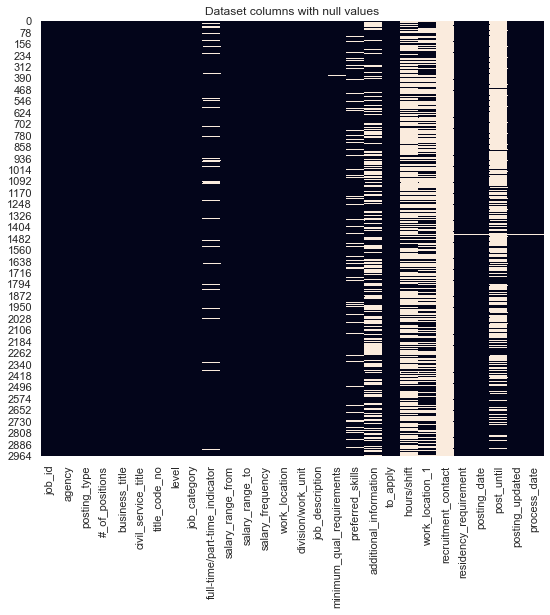

In [7]:
# Figure size
plot_null_data(job_data)

### Step 3: Imputing the missing values

The variables like Job Category, Full-Time/Part-Time indicator,Minimum Qual Requirements, Preferred Skills,Residency Requirement have missing values(NaN).

These have to be handled by filling meaningful values. These variables are categorical in nature, hence they can be imputed either by using Mode strategy or constant value strategy. 

In [9]:
# Identifying suitable variables based on the percentage of null values and the data type

null_limit = job_data.shape[0] * 0.3 # Minimum # number of records without null or NaN values
identified_cols = list()

data_with_null = job_data.isnull().sum() # Columns with null value count
try:
    for items in data_with_null.iteritems(): # Iterate through the pd.Series object
        if items[1] < null_limit:
            if job_data[items[0]].dtype in ('int64','object','float64'):
                identified_cols.append(items[0])
except ValueError as ve:
    pass

print("Identified variables:\n{0}".format(identified_cols))

Identified variables:
['job_id', 'agency', 'posting_type', '#_of_positions', 'business_title', 'civil_service_title', 'title_code_no', 'level', 'job_category', 'full-time/part-time_indicator', 'salary_range_from', 'salary_range_to', 'salary_frequency', 'work_location', 'division/work_unit', 'job_description', 'minimum_qual_requirements', 'preferred_skills', 'to_apply', 'residency_requirement']


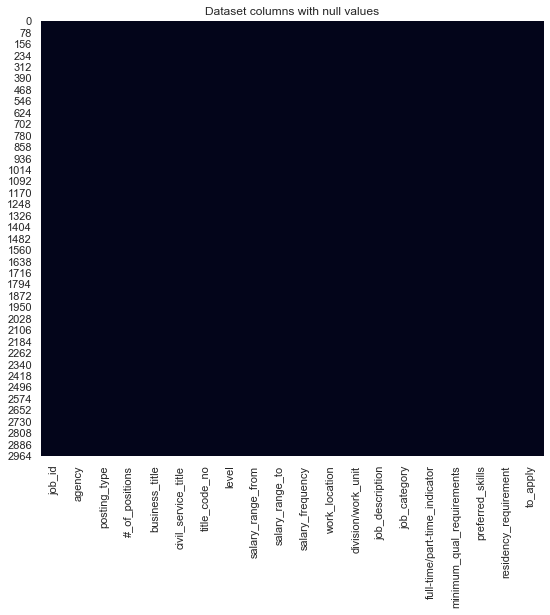

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
nan_cols = ['job_category', 'full-time/part-time_indicator','minimum_qual_requirements', 'preferred_skills','residency_requirement', 'to_apply']
cols = [col for col in identified_cols if col not in nan_cols]

# print(cols)
# Apply the imputation on the dataset
imputed_data = pd.DataFrame(imputer.fit_transform(job_data[nan_cols]), columns=nan_cols)

# # imputed_data.head()
posting_data = pd.concat([job_data[cols], imputed_data], axis=1)
# Empty values plot
# combined_data.isnull().sum()
plot_null_data(posting_data)

## Step 4: Feature Engineering

There are few variables in the dataset are of type text(refer the columns <a href="#datainfo">info</a>). We need perform certain feature engineering operations to clean, transform and reduce those features. 

The first and foremost text preprocessing step is to remove unwanted characters such as special characters, unwanted whitespaces and punctuation. The following functions will be used to remove the special charaters from the text data.


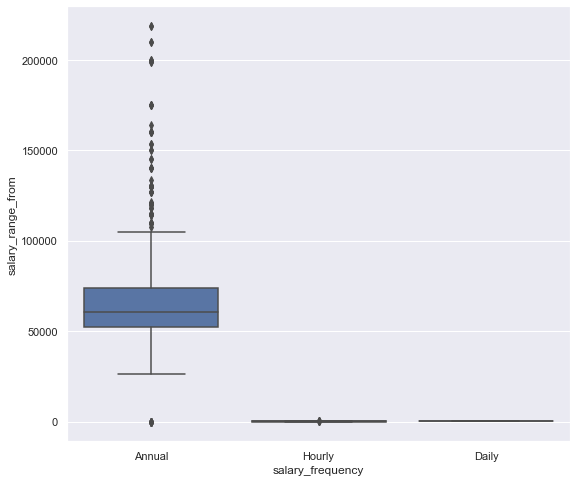

In [25]:
sns.boxplot(x='salary_frequency',y='salary_range_from', data=job_data)
plt.show()

In [26]:
print("Frequency: Hourly\n",job_data[job_data['salary_frequency'] == 'Hourly']['salary_range_from'].describe())
print("---"*40)
print("Frequency: Daily\n",job_data[job_data['salary_frequency'] == 'Daily']['salary_range_from'].describe())
print("---"*40)
print("Frequency: Annual\n",job_data[job_data['salary_frequency'] == 'Annual']['salary_range_from'].describe())

Frequency: Hourly
 count    216.000000
mean      27.139398
std       14.847692
min        8.750000
25%       15.500000
50%       20.370600
75%       34.630000
max       73.370000
Name: salary_range_from, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Frequency: Daily
 count     46.000000
mean     332.431957
std       86.970303
min      175.100000
25%      277.040000
50%      342.540000
75%      373.030000
max      501.920000
Name: salary_range_from, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Frequency: Annual
 count      2758.000000
mean      63655.961777
std       20883.465495
min           0.000000
25%       52000.000000
50%       60433.000000
75%       73938.000000
max      218587.000000
Name: salary_range_from, dtype: float64


It clearly indicates that `Salary_Range_From` is dependend on `Salary frequency`. Hence we have standarized the salary range to annual.

Daily - 8 hrs 
Monthly - 20 days 
Annual  - 12 Months

In [29]:
"""
    convert salary to annual salary. 
"""
def project_salary_to_annual(freq,salary):
    if (freq == 'Hourly'):
        return salary * 8 * 20 * 12
    elif (freq == 'Daily'):
        return salary * 20 * 12    
    else :
        return salary
    
# Invoking the method
job_data['projected_salary_from'] = job_data.apply(lambda x: project_salary_to_annual(x.salary_frequency, x.salary_range_from), axis=1)
job_data['projected_salary_to'] = job_data.apply(lambda x: project_salary_to_annual(x.salary_frequency, x.salary_range_to), axis=1)
    

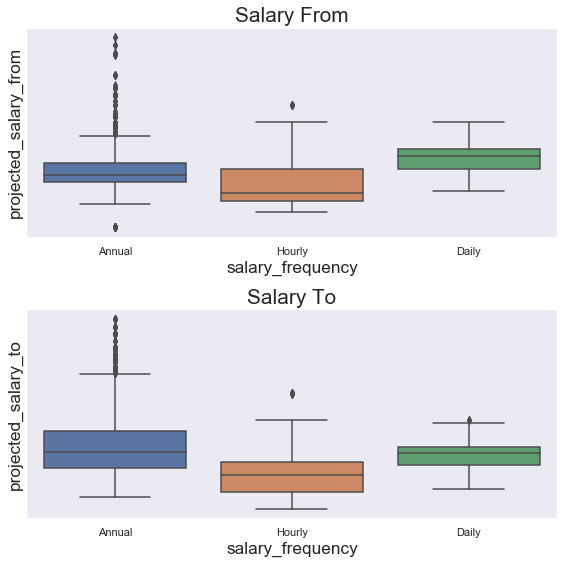

In [66]:
fig, axes = plt.subplots(2,1, figsize=(8,8), squeeze=False)
axes[0][0].set_title("Salary From")
axes[1][0].set_title("Salary To")

sns.boxplot(x='salary_frequency',y='projected_salary_from', data=job_data, ax=axes[0][0])
sns.boxplot(x='salary_frequency',y='projected_salary_to', data=job_data, ax=axes[1][0])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Row count of each column with missing values:


job_id                              0
agency                              0
posting_type                        0
#_of_positions                      0
business_title                      0
civil_service_title                 0
title_code_no                       0
level                               0
job_category                        2
full-time/part-time_indicator     209
salary_range_from                   0
salary_range_to                     0
salary_frequency                    0
work_location                       0
division/work_unit                  0
job_description                     0
minimum_qual_requirements          16
preferred_skills                  439
additional_information           1180
to_apply                            1
hours/shift                      2097
work_location_1                  1598
recruitment_contact              3020
residency_requirement               2
posting_date                        2
post_until                       2048
posting_upda

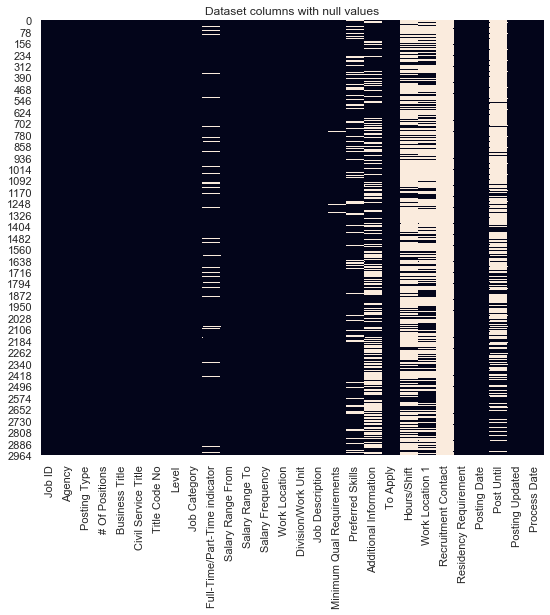

Identified variables:
['job_id', 'agency', 'posting_type', '#_of_positions', 'business_title', 'civil_service_title', 'title_code_no', 'level', 'job_category', 'full-time/part-time_indicator', 'salary_range_from', 'salary_range_to', 'salary_frequency', 'work_location', 'division/work_unit', 'job_description', 'minimum_qual_requirements', 'preferred_skills', 'to_apply', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date', 'Projected_Salary_From', 'Projected_Salary_To', 'projected_salary_from', 'projected_salary_to']


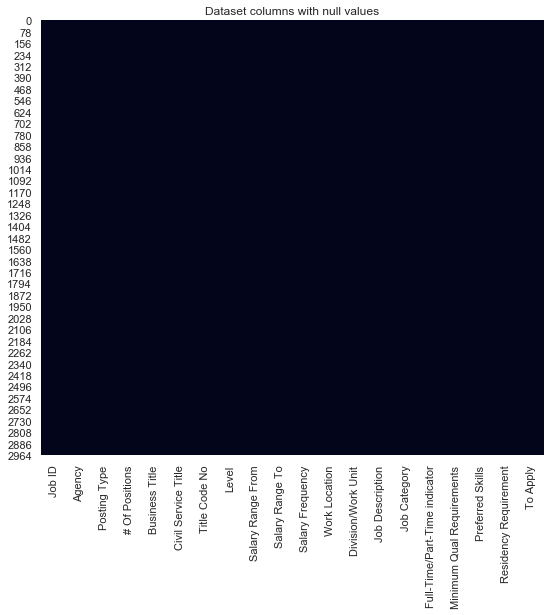

The above plot shows a clean dark background without any white lines across the column names, which implies that there are not NaN values in the dataset. 

In [67]:
"""
    Extracting the year value from the preferred skills attribute
"""
def extract_years_exp(doc):
    phrase = ""
    num_year = 1
    try:
        str_num_pattern = r'(zero|one|two|three|four|five|six|seven|eight|nine|ten)'
        num_dict = {'zero':0, 'one':1, 'two':2, 'three':3, 'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10}
        # Search for text numeric value
        match = re.search(str_num_pattern, doc, re.IGNORECASE)
        if match:
            statement = re.sub(str_num_pattern, str(num_dict[match.group(0).lower()]), doc.lower(), re.IGNORECASE)
            statement = statement.strip()
        
            exp_pattern = r'.?[(0-9)|(0-9\+)]\s+years'
        
            exp_phrase = re.search(exp_pattern, statement, re.IGNORECASE)
            if exp_phrase:
                opr_pattern = r'(\+|\)|\(|\-|years)'
                phrase = exp_phrase.group(0).strip()    
                year_val = re.sub(opr_pattern, "", phrase).strip()
                
                if year_val:
                    num_year = int(year_val)
                    if int(year_val) > 10:
                        num_year = int(year_val[0])
                    else:
                        num_year
        else:
            phrase = np.nan
    except IndexError as ie:
        pass
    return num_year

def extract_skills(doc):
    statement = ""
    num_year = 1
    try:
        patterns = (r'=?.(with|proficiency)\s+\w{3}+', r'\w{2}+\s+(skills|acquired)')
        # Search for text numeric value
        for ptrn in patterns:
            match = re.search(ptrn, doc, re.IGNORECASE)
            if match:
                statement = match.group(0).lower().strip()
                break
    except IndexError as ie:
        pass
    return statement


'''
    Cleanse the special characters, white space and punctuations.
'''
def cleanse_text_impurities(text_val):
    try:
        # remove the special characters
        text_val = re.sub(r'[^(a-zA-Z)|(0-9)\s]', ' ', text_val, re.I|re.A)
        text_val = text_val.strip()
        
        return text_val
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))
'''
    Removes the english language stop words
''' 
def remove_stopwords(text_val):
    try:
        word_tokenizer = nltk.WordPunctTokenizer()
        stopwords = nltk.corpus.stopwords.words("english")
              
        # tokenize the sentences
        tokens = word_tokenizer.tokenize(text_val)
        
        # Filter stop words 
        filterd_tokens = [tok for tok in tokens if tok not in stopwords]
        
        return ' '.join(filtered_tokens)
        
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))

#### Cleansing of text value

The cleansing activity of text value usually involves with removal of whitespaces, special characters and other ASCII characters. Here, the cleansing function is applied for all the given text fields. 

In [321]:
str_cols = ['Job Description', 'Full-Time/Part-Time indicator', 'Minimum Qual Requirements','Preferred Skills','Residency Requirement']

# Iterate through the dataframe and apply the cleansing function
for col in str_cols:
    posting_data[col] = posting_data[col].apply(cleanse_text_impurities)

posting_data[str_cols]

,Job Description,Full-Time/Part-Time indicator,Minimum Qual Requirements,Preferred Skills,Residency Requirement
0,Division of Economic Financial Opportunity (...,F,1 \tA baccalaureate degree from an accredited ...,Excellent interpersonal and organizational ski...,New York City residency is generally required ...
1,The New York City Department of Small Business...,F,1 A baccalaureate degree from an accredited c...,ERROR NAME,New York City residency is generally required ...
2,Under direct supervision assist in the routin...,F,1 Three years of full time satisfactory exper...,1 A High School Diploma or GED 2 CDL Dri...,NYCHA has no residency requirements
3,Under direct supervision assist in the routin...,F,1 Three years of full time satisfactory exper...,1 A High School Diploma or GED 2 CDL Dri...,NYCHA has no residency requirements
4,Responsibilities of selected candidates will i...,F,1 Five years of full time satisfactory experi...,ERROR NAME,NYCHA has no residency requirement
...,...,...,...,...,...
3015,The City of New York Department of Housing Pre...,F,1 A master s degree from an accredited colleg...,Excellent judgment editing writing and inter...,New York City residency is generally required ...
3016,Your Team The Office of Enforcement and Neig...,F,Qualification Requirements 1 High school gra...,Must possess excellent written and verbal comm...,New York City residency is generally required ...
3017,Your Team The Office of Enforcement and Neig...,F,Qualification Requirements 1 High school gra...,Must possess excellent written and verbal comm...,New York City residency is generally required ...
3018,The Commission on Human Rights (the Commission...,F,1 A baccalaureate degree issued after complet...,Advanced working proficiency in Microsoft Offi...,New York City residency is generally required ...


#### Extracting year of experience 

The year of experience is a required information to understand more on the relationship between the salary and years of experience. However, the data is hidden in the text data of `Preferred Skills` field. We need to perform a search to identify the pattern of years and transform the extracted information into a numerical values. 

In [322]:
# posting_data['Experience Phrase'] = posting_data.head(50)['Preferred Skills'].apply(extract_years_exp)
posting_data['Years of Experience'] = posting_data['Preferred Skills'].apply(extract_years_exp)

In [323]:
posting_data['Years of Experience']

0       1
1       1
2       1
3       1
4       1
       ..
3015    1
3016    1
3017    1
3018    1
3019    1
Name: Years of Experience, Length: 3020, dtype: int64

In [324]:
# documents = ['Ability to code .NET and Java script from scratch 2+ years of experience with Dynamics CRM 2010/2013 Experience Developing Plugins 3 -5 years .NET and C# Coding 2+ years of SQL 2008/2012 experience with store procedure / SSIS/SSRS/ database design/maintenance',
#              'Five years of managerial and supervisory experience.  2.  Excellent verbal and written communication skills.   3.  Ability to work collaboratively with others.  4.  Ability to perform detailed work under time-sensitive deadlines.',
#              'Minimum 5 years of experience planning, designing, configuring, installing, troubleshooting and maintaining data and voice networks.  Experience in performance and capacity monitoring required.  Cisco Certified Network Professional certification preferred.  Familiarity with Cisco network technology (routers, switches, IOS, NX-OS, Firewall ASA, Intrusion Prevention System, Secure Access Control System and Fiber Channel Over IP) and with Avaya telephone systems strongly preferred.  Experience with Voice Over IP (VoIP), disaster recovery, automated failover, resilient networks, performance and capacity monitoring, load balancing, network security, and  wireless networks (Wi-Fi) are desirable.',
#              'The preferred candidate should possess the following: A BachelorÃ¢â‚¬â„¢s degree in a related IT field; 3+ years experience in a specialized role that includes implementation, support, and maintenance of large scale n-tier web applications; 3+ years hands-on experience with large scale data warehouses and analytics products; 3+ years of Relational and dimensional database experience; 3+ years PL/SQL experience; extremely proficient; 3+ years experience in business intelligence; performance tuning experience; data modeling experience; knowledge of HTML, XML and CSS and scripting; experience with MS SQL reporting; experience utilizing SAP business objects products for reports and administrating business object environment; knowledge of the implications of developing for high-availability clustered environments; experience MS SQL Reporting Services; experience with UNIX shell scripting; strong knowledge of server and application architectures; ability to work in cross functional teams to provide the best solution; strong customer and quality-focus; sound problem resolution, judgment, and decision-making skills; ability to work directly with customers to elicit and document reporting requirements; ability to develop clear and actionable reporting specifications based on these requirements; demonstrated experience working with technical and non-technical staff; outstanding collaboration and team building skills; strong written and verbal communication skills; excellent analytic, organization, presentation and facilitation skills; experience with WebLogic cluster environment; Database experience with MS SQL; experience with MS IIS Web Server and other J2EE application server such as Tomcat, JBOSS, WebSphere; and the ability to handle multiple tasks under tight deadlines.',
#              'Experience Developing Plugins 3 -5 years .NET and C# Coding 2',
#              'information systems management, computer science, or equivalent experience;6+ years of DevOps or similar production / platform engineering experience, 1-2 of which in'
# ]
# print(documents[5])
# years_phrases = [extract_years_exp(doc) for doc in documents]
# preferred_skills = [extract_skills(doc) for doc in documents]
# print("Phrase matched:{0} ".format(years_phrases))

# print("Skills:{0} ".format(preferred_skills))


## Step 5: Analysis

The analysis are done on the following questions,

* a. What are the highest paid skills in the US market?
* b. What are the highest paid Job Category in the US market?


In [46]:
# highest_paid_skills = posting_data.groupby(['Job Category','Preferred Skills'])['Salary Range From','Salary Range To'].mean()
highest_paid_skills = posting_data.groupby(['Job Category','Preferred Skills'])['Salary Range From'].mean()

highest_paid_skills = highest_paid_skills.reset_index()
top_paid_list = highest_paid_skills.nlargest(10, 'Salary Range From')
# top_paid_list.sort_values(by='Salary Range From', ascending=False)

The following table shows the top 10 preferred skills and job category in the US job market. 

In [47]:
# Lambda expression to split the comma delimited category name and extract only the first token
short_job_name = lambda x: x.split(',')[0]

top_paid_list.index = top_paid_list['Job Category'].apply(short_job_name)
top_paid_list.drop(['Job Category'], axis=1)
# Print the top paid skillset list
# top_paid_list

,Preferred Skills,Salary Range From
Job Category,,
Administration & Human Resources Finance,The Deputy Commissioner position requires exce...,218587.0
Engineering,The Deputy Commissioner position requires \te...,209585.0
Constituent Services & Community Programs Communications & Intergovernmental Affairs Policy,ERROR NAME,200000.0
Engineering,Extensive experience in wastewater operations ...,198518.0
Administration & Human Resources Policy,ERROR NAME,175000.0
Engineering,Required Skills \tIn depth knowledge of projec...,175000.0
Technology,The successful candidate will have years of s...,164104.0
Administration & Human Resources Public Safety,At least years of managerial experience in go...,160000.0
Finance,Clearly demonstrated experience trading money ...,160000.0


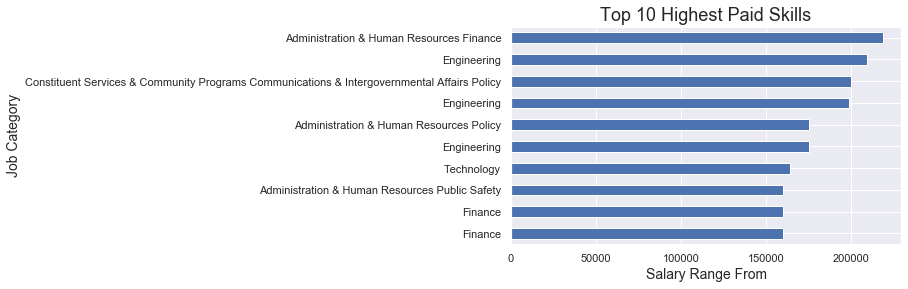

In [48]:
fig, barax = plt.subplots(figsize=(7,4))
top_paid_list.plot(ax=barax, kind='barh', legend = False)

barax.set_title("Top 10 Highest Paid Skills", fontsize=18)
barax.set_ylabel("Job Category", fontsize=14)
barax.set_xlabel("Salary Range From", fontsize=14)
# barax.legend(bbox_to_anchor=(1.0, 1.00))
barax.invert_yaxis()
plt.show()

`Note: The preferred skills is a text blob field, which has more words which can not be ploted in the graph. Hence the data are plotted against the job category.`

In [49]:
print("The highest paid skills in the US job market is :\n {0}".format(top_paid_list['Preferred Skills'][0]))
print("==="*40)
print("The Job Category is- {0}".format(top_paid_list['Job Category'][0]))

The highest paid skills in the US job market is :
 The Deputy Commissioner position requires excellent leadership communication and client service skills as well as a passion for driving innovation continuous improvement and efficiency and implementing workforce strategies to recruit develop and retain the most qualified and diverse talent in a customer service environment The selected candidate will be expected to work closely with Agency and oversight counterparts and must have excellent management skills focused on staff alignment with the Bureaus vision goals and career development In addition heshe must be an effective team player capable of sustaining a culture of excellence in the delivery of customer service to internal partners and possess the ability to establish and maintain effective external partnerships and collaboration   Specifically the following skills and abilities are required to be successful in this role    	 years relevant work experience leading customer focused

### 5.c Clustering Technique

In [31]:
jobs_by_category

,Job Category,Job ID
0,Administration & Human Resources,137
1,Administration & Human Resources Building Oper...,10
2,Administration & Human Resources Communication...,6
3,Administration & Human Resources Communication...,1
4,Administration & Human Resources Communication...,2
...,...,...
129,"Technology, Data & Innovation",283
130,"Technology, Data & Innovation Building Operati...",6
131,"Technology, Data & Innovation Legal Affairs",2
132,"Technology, Data & Innovation Policy, Research...",18


In [34]:
jobs_by_category.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133], dtype=int64)

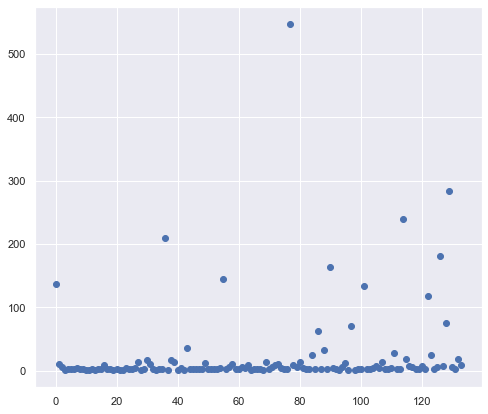

In [35]:
fig, job_ax = plt.subplots(figsize=(8,7))
plt.scatter(jobs_by_category.index.values, jobs_by_category['Job ID'])
plt.show()